In [1]:
import kaggle

In [0]:
! mkdir -p /root/.kaggle
! mv kaggle.json /root/.kaggle

In [3]:
! ls -lA /root/.kaggle

total 4
-rw-r--r-- 1 root root 69 Mar  8 15:33 kaggle.json


In [0]:
import kaggle

In [5]:
!kaggle competitions download -c dogs-vs-cats

sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
%tensorflow_version 2.x

In [6]:
!unzip -q train.zip

replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train/cat.1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n A
replace train/cat.10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
#!ls train

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

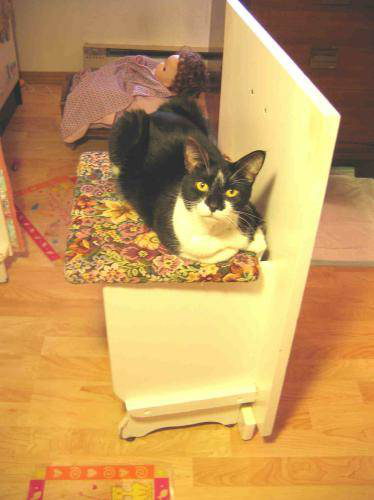

In [9]:
Image.open("./train/cat.7750.jpg")

In [10]:
cv2.imread("./train/cat.7750.jpg").shape

(500, 374, 3)

In [11]:
cv2.imread("./train/dog.12245.jpg").shape


(499, 377, 3)

In [0]:
img1=cv2.imread("./train/dog.12245.jpg")

In [13]:
img1.shape

(499, 377, 3)

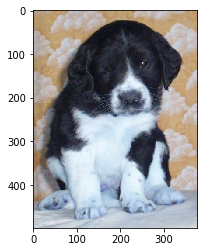

In [14]:
plt.imshow(img1)

In [0]:
#resizing the image to achieve  the same size for all the images
img2=cv2.resize(img1,(300,300))

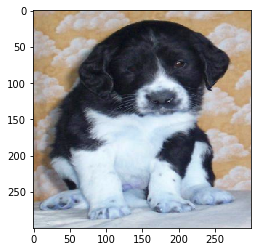

In [16]:
plt.imshow(img2)

In [0]:
import os
from tqdm import tqdm_notebook

In [18]:
os.listdir("./train")

['cat.2189.jpg',
 'cat.4579.jpg',
 'cat.5154.jpg',
 'dog.828.jpg',
 'dog.6892.jpg',
 'dog.10329.jpg',
 'cat.10716.jpg',
 'dog.12090.jpg',
 'dog.4567.jpg',
 'cat.3900.jpg',
 'cat.10107.jpg',
 'cat.10381.jpg',
 'cat.5465.jpg',
 'dog.5261.jpg',
 'cat.5556.jpg',
 'cat.9548.jpg',
 'cat.6869.jpg',
 'dog.4884.jpg',
 'dog.168.jpg',
 'dog.4720.jpg',
 'dog.8133.jpg',
 'dog.7457.jpg',
 'dog.11242.jpg',
 'dog.5112.jpg',
 'dog.11502.jpg',
 'dog.11351.jpg',
 'cat.11320.jpg',
 'cat.12285.jpg',
 'cat.6124.jpg',
 'dog.2979.jpg',
 'cat.1147.jpg',
 'cat.6141.jpg',
 'dog.8526.jpg',
 'cat.5566.jpg',
 'dog.5588.jpg',
 'dog.8779.jpg',
 'cat.4975.jpg',
 'dog.2040.jpg',
 'dog.12463.jpg',
 'cat.2310.jpg',
 'cat.6129.jpg',
 'dog.7872.jpg',
 'dog.3756.jpg',
 'cat.12075.jpg',
 'dog.8423.jpg',
 'cat.10703.jpg',
 'dog.609.jpg',
 'cat.1472.jpg',
 'dog.10442.jpg',
 'cat.7152.jpg',
 'cat.6693.jpg',
 'dog.7521.jpg',
 'cat.5392.jpg',
 'cat.3064.jpg',
 'cat.4219.jpg',
 'cat.7427.jpg',
 'dog.6799.jpg',
 'cat.9495.jpg',
 'c

In [19]:
#sizing all the files using for loop and preparing input and output
#simple models are in to sequntials
#complex models into functional
image_list=[]
label_list=[]
for file in tqdm_notebook(os.listdir("./train")[:10000]):
  #print(file)
  if file.startswith("dog"):
    label_list.append("dog")
  else:
    label_list.append("cat")

  img=cv2.imread("./train/"+file)
  img=cv2.resize(img,(300,300))
  image_list.append(img)

In [20]:
len(image_list),len(label_list)

(10000, 10000)

In [0]:
X=np.array(image_list)

In [22]:
X.shape

(10000, 300, 300, 3)

In [0]:
#suffle data to devide it into train and test
from sklearn.model_selection import train_test_split




In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,label_list,test_size=0.2,shuffle=True)

In [25]:
x_train.shape,x_test.shape

((8000, 300, 300, 3), (2000, 300, 300, 3))

In [26]:
len(y_train), len(y_test)

(8000, 2000)

In [0]:
del X
del image_list
del label_list 

In [28]:
y_train[:5]

['cat', 'cat', 'cat', 'dog', 'dog']

In [0]:
y_train_1 = pd.get_dummies(y_train) #another way of doing OneHotEncoding
y_test_1 = pd.get_dummies(y_test) #another way of doing OneHotEncoding

In [30]:
type(y_train_1), type(y_train_1.values)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [0]:
y_train = y_train_1.values
y_test = y_test_1.values

In [0]:
x_train = x_train /255
x_test = x_test /255

In [33]:
y_train.sum(axis=0)

array([3992, 4008], dtype=uint64)

In [34]:
y_test.sum(axis=0)

array([1016,  984], dtype=uint64)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Accuracy

In [36]:
model = Sequential()
model.add(Flatten(input_shape = (300, 300, 3)))  #28 * 28 
model.add(Dense(256, activation=relu))
# model.add(Dense(256, activation=relu))
model.add(Dense(2, activation=softmax))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 270000)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               69120256  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 69,120,770
Trainable params: 69,120,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Other possible aCcuracy /metrics, IOU(Intersection over Union), MAP (Mean Average Precision)
model.compile(SGD(), categorical_crossentropy, ["acc"])

In [0]:
model_history = model.fit(x_train, y_train, 32, epochs=50, validation_split=0.1)

Train on 7200 samples, validate on 800 samples
Epoch 1/50
7200/7200 [==============================] - 19s 3ms/sample - loss: 1.0171 - acc: 0.5285 - val_loss: 0.6834 - val_acc: 0.5550
Epoch 2/50
7200/7200 [==============================] - 18s 2ms/sample - loss: 0.6785 - acc: 0.5658 - val_loss: 0.6679 - val_acc: 0.5838
Epoch 3/50
7200/7200 [==============================] - 17s 2ms/sample - loss: 0.6685 - acc: 0.5974 - val_loss: 0.6729 - val_acc: 0.5938
Epoch 4/50
7200/7200 [==============================] - 17s 2ms/sample - loss: 0.6631 - acc: 0.6036 - val_loss: 0.6694 - val_acc: 0.5863
Epoch 5/50
7200/7200 [==============================] - 18s 2ms/sample - loss: 0.6558 - acc: 0.6121 - val_loss: 0.6667 - val_acc: 0.5863
Epoch 6/50
7200/7200 [==============================] - 18s 2ms/sample - loss: 0.6485 - acc: 0.6229 - val_loss: 0.6960 - val_acc: 0.5925
Epoch 7/50
7200/7200 [==============================] - 17s 2ms/sample - loss: 0.6476 - acc: 0.6307 - val_loss: 0.6613 - val_acc: 0

In [0]:
model_history.history.keys()

In [0]:
plt.plot(model_history.history["acc"])
plt.plot(model_history.history["val_acc"])

In [0]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])

In [0]:
# Underfitting Vs Overfitting 